In [1]:
# Import Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# Read the data
df = pd.read_csv('/kaggle/input/summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv')
df = df[['price', 'units_sold']]
df.head()

,price,units_sold
0,16.00,100
1,8.00,20000
2,8.00,100
3,8.00,5000
4,2.72,100


In [3]:
# Calculating the revenue
df['revenue'] = df['units_sold'] * df['price']
df.head()

,price,units_sold,revenue
0,16.00,100,1600.0
1,8.00,20000,160000.0
2,8.00,100,800.0
3,8.00,5000,40000.0
4,2.72,100,272.0


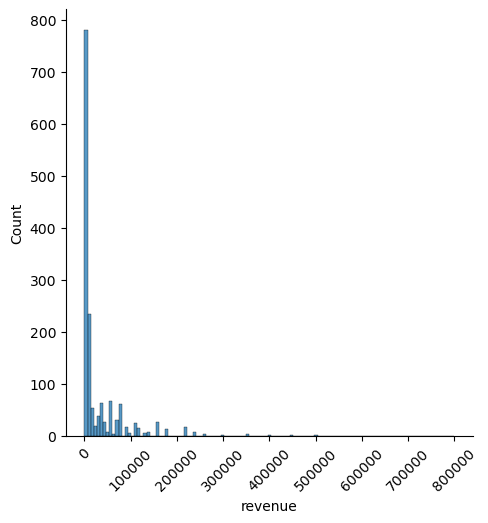

In [4]:
# Distribution for Revenue
sns.displot(df['revenue'])
plt.xticks(rotation=45)
plt.show()

In [5]:
# Function to create bins
def bins(x):
    for bar in range(20000, 820000, 20000):
        if x<=bar:
            return bar
# Apply the function to the dataframe
df['rev_dist'] = df['revenue'].apply(lambda x: bins(x))
df.head()

,price,units_sold,revenue,rev_dist
0,16.00,100,1600.0,20000
1,8.00,20000,160000.0,160000
2,8.00,100,800.0,20000
3,8.00,5000,40000.0,40000
4,2.72,100,272.0,20000


In [6]:
# Creating a support column
df['count'] = 1
df.head()

,price,units_sold,revenue,rev_dist,count
0,16.00,100,1600.0,20000,1
1,8.00,20000,160000.0,160000,1
2,8.00,100,800.0,20000,1
3,8.00,5000,40000.0,40000,1
4,2.72,100,272.0,20000,1


In [7]:
# create a pivot table of revenue distribution
pivot_table = pd.pivot_table(df, index=['rev_dist'], values='count', aggfunc = np.sum)
pivot_table

,count
rev_dist,
20000,1072
40000,120
60000,104
80000,98
100000,25
120000,41
140000,14
160000,28
180000,14


In [8]:
# Clustering
Kmeans = KMeans(n_clusters=3)
Kmeans.fit(pivot_table)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
pivot_table['Categories'] = Kmeans.labels_

In [10]:
pivot_table

,count,Categories
rev_dist,,
20000,1072,1
40000,120,2
60000,104,2
80000,98,2
100000,25,0
120000,41,0
140000,14,0
160000,28,0
180000,14,0


In [11]:
# create a dic for ABC analysis
ABC_dict = {
    0:"A",
    1:"B",
    2:"C"
}
pivot_table['ABC'] = pivot_table['Categories'].apply(lambda x: ABC_dict[x])
pivot_table

,count,Categories,ABC
rev_dist,,,
20000,1072,1,B
40000,120,2,C
60000,104,2,C
80000,98,2,C
100000,25,0,A
120000,41,0,A
140000,14,0,A
160000,28,0,A
180000,14,0,A


In [12]:
pivot_table.reset_index(inplace=True)

In [13]:
final = pd.pivot_table(pivot_table, index='ABC', values='rev_dist', aggfunc='sum').reset_index()
final['Percenatage'] = final['rev_dist'].apply(lambda x: (x/sum(final['rev_dist'])*100))
final

,ABC,rev_dist,Percenatage
0,A,8460000,97.690531
1,B,20000,0.230947
2,C,180000,2.078522
